<a href="https://colab.research.google.com/github/padeossa/mlstuff/blob/main/Copy_of_Coding_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()

print(diabetes_dataset["DESCR"])


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
# Save the input and target variables
diabetes_dataset.keys()

data = diabetes_dataset.get('data')
targets = diabetes_dataset.get('target')


In [4]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0))/ targets.std()


In [5]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data,targets, test_size=0.1)



#### Train a feedforward neural network model

In [6]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
  model = Sequential([
      Dense(128,activation='relu', input_shape = (train_data.shape[1], )),
      Dense(128,activation='relu'),
      Dense(128,activation='relu'),
      Dense(128,activation='relu'),
      Dense(128,activation='relu'),
      Dense(128,activation='relu'),
      Dense(1)
  ])
  return model

model = get_model()




In [7]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [8]:
# Compile the model
model.compile(optimizer='adam',loss="mse", metrics=["mae"])


In [9]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs = 100, validation_split=0.15, batch_size=64, verbose=False  )


In [10]:
# Evaluate the model on the test set
model. evaluate(test_data, test_targets, verbose=2 )


2/2 - 0s - loss: 1.2478 - mae: 0.8074 - 44ms/epoch - 22ms/step


[1.2477537393569946, 0.8074445724487305]

#### Plot the learning curves

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

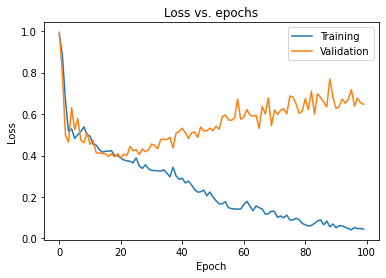

In [12]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [34]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [36]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer = regularizers.L2(wd),  activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.L2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.L2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.L2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.L2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.L2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [38]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-5,0.3)


In [40]:
# Compile the model
model.compile(optimizer="adam", loss= "mse", metrics=["mae"])


In [41]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs = 100, validation_split=0.15, batch_size=64, verbose=False  )



In [42]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2 )


2/2 - 0s - loss: 0.6585 - mae: 0.5635 - 96ms/epoch - 48ms/step


[0.6585463881492615, 0.5634838342666626]

#### Plot the learning curves

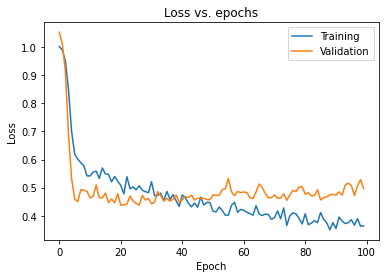

In [43]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [20]:
# Write a custom callback



In [21]:
# Re-build the model



In [22]:
# Compile the model



#### Train the model with the callback

In [23]:
# Train the model, with some of the data reserved for validation



In [24]:
# Evaluate the model



In [25]:
# Make predictions with the model



***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [26]:
# Re-train the unregularised model



In [27]:
# Evaluate the model on the test set



In [28]:
# Re-train the regularised model



In [29]:
# Evaluate the model on the test set



#### Plot the learning curves

NameError: ignored

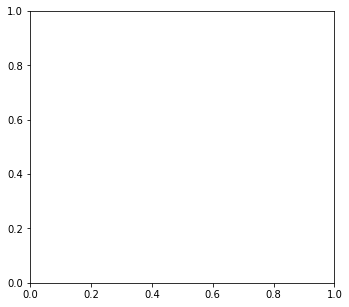

In [30]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()